# Practical 2 

This practice is about solving problems by using search techniques to build planning agents. We also look at cases where reflex agents are useful. 

### Formulation of a Search Problem
To apply search techniques a problem must be formulated in a specific way (this is called building a model or modelling).

Search problems have the following elements:
- States
- Initial state
- Actions
- Tranisition model
- Goal test
- Path cost

(see page 73 of the text Russel and Norvig, 2016).

### Why Tree Search?
Unlike in the graph search version of DFS that was implemented last week, in the tree search versions no complete record of states (visited nodes) is kept. In data structures and algorithms or other courses you may have studied graph search algorithms such as Dijkstra's Algortihm for finding the shortest path between nodes in a graph. The main problems are that graph algorithms work on the entire graph and also assume the graph is fixed. In planning problems in AI we are often interested in:  
- Very large and even infinite state spaces. 
- Unknown environments where search is combined with exploration (and graph connections may not be known untill they are expanded.  

It is not possible input the entire graph to the algorithm or even maintain all visited nodes in memory. 

### General Tree Search Algorithm
```
function TREE-SEARCH(problem, strategy) returns a solution, or failure
iniitalze the frontier (first node or nodes of the search tree) with initial state
loop do
    if the frontier is empty then return failure
    choose a leaf node and remove it from the frontier
    if the node contains a goal state then return the corresponding solution
    expand the chossen node, adding the resulting nodes to the frontier
```

(see page 77 of the text and compare with the general graph search algorithm).

### Frontier and Strategy
A fundamental difference between different tree algorithms is in the strategy to select which nodes to expand next (that is which nodes to remove from the frontier and expand). The strategy is usually implemented as a priority queue.
- DFS uses a LIFO queue (ie stack)
- BFS uses a FIFO queue
- Uniform cost search uses a priority queue with priority set by cummulative path cost (ie the cost so far)
- Hueristic search sets priority by using a function to estimate the distance to the goal node (ie estimated forward cost)
- A*, in its priority queue, sets the priority by combining the forward cost the cost so far, as in uniform cost search (which is also called backward cost) and the estimated cost from the heuristic (also called forward cost).

### Theory Questions

It is important to attempt the theory questions and also do the reading and lecture questions to learn the material (and do well in exams)...

In weeks 3 and 4 the focus is on modelling problems using the search formulation and search algorithms including informed and uninformed search. This is covered in Chapter 3 in the textbook.

Reading: Chapter 3.

#### Question 1
Attempt the following questions from the textbook: 3.22, 3.24, 3.29


[write your answser here...]

#### Question 2
Execute tree search through the graph provided. In tree search we do not remember visited nodes (to answer this question see also ch 3 in the textbook).

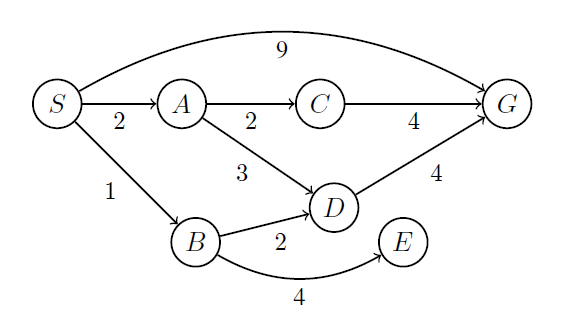

Edge costs are given on edges. 

Heuristic values are as follows:
- $h(S)=6$ 
- $h(A)=0$ 
- $h(B)=6$ 
- $h(C)=4$ 
- $h(D)=1$ 
- $h(E)=10$ 
- $h(G)=0$ 

a) Breadth First Search (BFS)
- Order of nodes expanded:
- Path found:
- Path cost:

In [ ]:
[write your answser here...]

b) Uniform Cost Search (UCS)
- Order of nodes expanded:
- Path found:
- Path cost:

In [ ]:
[write your answser here...]

c) Greedy Heursitic (best first search)
- Order of nodes expanded:
- Path found:
- Path cost:

In [ ]:
[write your answser here...]

d) A* hueristic
- Order of nodes expanded:
- Path found:
- Path cost:

In [ ]:
[write your answser here...]

(to answer the next two questions read page 94 and 95 in the textbook)

e) Is hueristic $h(n)$ admissible?

In [ ]:
[write your answser here...]

d) Is hueristic $h(n)$ consistent?

In [ ]:
[write your answser here...]

## Practical Questions

The following are coding questions.

### Question 1: Reflex Agents

Recall the vacuum world which has the following states:
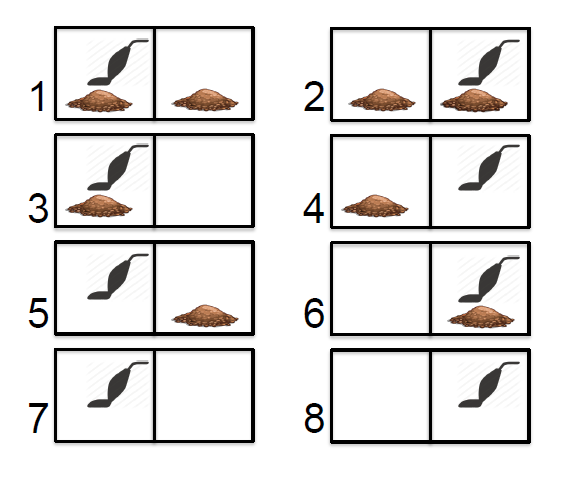
(see section 2.1 in the textbook)

    Basic vacuum world specified on page 38 and depicted in Figure 2.2.

    There are two locations, A and B, and one agent. Either or both
    locations may contain dirt. The agent perceives its current location
    and whether there is dirt there.

    The agent may move left, move right, or suck up the dirt in its
    current location. Sucking cleans the current square and clean
    squares stay clean.

In the implementation the following locations and actions exist:
```
locations = ['A', 'B']
actions = ['LEFT', 'RIGHT', 'SUCK']
```

First load some packages implementing the vacuum world environment:

In [2]:
import vacuum_world
environment = vacuum_world.BasicVacuumWorld()
evaluator = vacuum_world.CleanFloorEvaluator()

We will run the vacuum world with 1000 steps and we will use an evaluator which counts the number of steps in which each square (either A, or B) is clean.

Now run some experiments (you can review the code in the file vacuum_world.py and also run at the command line if you like).

IMPORTANT: when you run more experiments after the following one you should reset the environment and evaluator otherwise will have problems in the initial state and the score accumulating.

To impelment an agent we can run the following code to initialize a class for an agent that always sucks:

In [3]:
# Sucking agent: in the first experiment test an agent that always sucks

class SuckingAgent(object):
    """
    Vacuum World agent that only chooses the SUCK action.
    """
    def decide(self, _):
        """
        Suck up the dirt, if there is any.

        :param _: for compliance with the agent interface; not used.
        """
        return 'SUCK'

# create a sucking agent object
agent = SuckingAgent()

In [4]:
# run 1000 iterations of the vacuum world with the sucking agent just defined
vacuum_world.run_experiment(environment,agent,evaluator)
print ("score =", evaluator.score)

score = 1000


a) Why was the score 1000?

[your answer here]

b) Now create an agent that always returns the action to try to go right. What do you think this score will be when the initial state is that both squares are dirty?

In [6]:
# Go right agent: in the first experiment test an agent that always sucks

class RightAgent(object):
    """
    Vacuum World agent that only chooses the RIGHT action.
    """
    def decide(self, _):
        """
        Go right

        :param _: for compliance with the agent interface; not used.
        """


# create a right agent object
agent = RightAgent()

# run 1000 iterations of the vacuum world with the agent just defined
environment = vacuum_world.BasicVacuumWorld()
evaluator = vacuum_world.CleanFloorEvaluator()

vacuum_world.run_experiment(environment,agent,evaluator)
print ("score =", evaluator.score)

ExperimentError: ('agent', ValueError(None,))

In [ ]:
c) Create a random agent

In [7]:
# Go right agent: in the first experiment test an agent that always sucks

class RandomAgent(object):
    """
    Vacuum World agent that randomly chooses one of the 3 possible actions
    """
    def decide(self, _):
        """
        Go right

        :param _: for compliance with the agent interface; not used.
        """

        location = _['agent_location']
        isDirty = _['is_dirty']
        print (_)
        if(isDirty): return 'SUCK'
        if(location == 'A'): return 'RIGHT'
        if(location == 'B'): return 'LEFT'

# create a random agent object
agent = RandomAgent()

# reinitialise the variables
environment = vacuum_world.BasicVacuumWorld()
evaluator = vacuum_world.CleanFloorEvaluator()

# run experiment
vacuum_world.run_experiment(environment,agent,evaluator)
print ("score =", evaluator.score)

{'agent_location': 'A', 'is_dirty': True}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': True}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_location': 'B', 'is_dirty': False}
{'agent_location': 'A', 'is_dirty': False}
{'agent_locat

d) Now implement and test a rational agent (review section 2.1 and theory question 2.1 to decide what agent you think might be rational in the vacuum world.

In [53]:
class RationalAgent(object):
    """
    Vacuum World agent that performs rationally in basic world.
    """

    def decide(self, _):
        """
        

        :param _: for compliance with the agent interface; not used.

        """
... your code here

    

SyntaxError: invalid syntax (<ipython-input-53-64fd1d155c59>, line 13)

In [60]:
# evaluate the agent
# create the rational agent object
agent = RationalAgent()

# reinitialise the variables
environment = vacuum_world.BasicVacuumWorld()
evaluator = vacuum_world.CleanFloorEvaluator()

# run experiment
vacuum_world.run_experiment(environment,agent,evaluator)
print ("score =", evaluator.score)

# check that the agent is rational (a rational agent should require at most 3 moves to clean the 2 dirty squares)
assert evaluator.score > 1997, "Not a rational agent!"

score = 1000


AssertionError: Not a rational agent!

### Question 2 - Planning Agents

The missionaries and cannibals problem is usually stated as follows. Three missionaries and three cannibals are on one side of a river, along with a boat that can hold one or two people. Find a way to get everyone to the other side without ever leaving a group of missionaries in one place outnumbered by the cannibals in that place. The problem is famous in AI because it was the subject of the first paper that approached problem formulation from an analytical viewpoint (see Amarel, 1968).

[Amarel,1968](https://www.ics.uci.edu/~rickl/courses/cs-171/0-emj-2017-wq/cultural_enrichment/MI3-Ch.10-Amarel.pdf) 
Summary: A variety of different representations for missionaries and
cannibals problem are explored in order to demonstrate the
relationship between representation language and the size of the
search space needed to solve a problem.  There is some detailed
discussion of the relationship between an informal natural language of
problems and the analysis leading to a representation language. 
Main Point: The representation of a system can dramatically affect the
efficiency of problem solving within the system.

You can also download and run the java applet here: http://www.aiai.ed.ac.uk/~gwickler/missionaries.html and obtain a deeper understanding of the problem. 

a) Formulate the problem precisely with only the necessary distinctions for ensuring a valid solution. Draw the complete state space.

b) Implement and solve the problem using search (want to find an optimal solution - so select an appropriate algorithm).

This requires some work - see an example of implementation using a similar representation to the one we usediterative deepening here: https://github.com/gbroques/missionaries-and-cannibals and adapting it to implement breadth first search instead (and converting to a jupyter notebook in a similar way to the previous question).

c) Why is this a difficult problem for people to solve given the state space is simple (can review online sources to answer this question).

### Question 3 - Coding problem
We have a pile of crates at our warehouse that we want to load onto trucks. Our plan is to divide the pile in half forming two smaller piles, then continuing dividing each of the small piles in half until we get piles that will fit on a truck. (Of course, when we divide an odd number of crates in "half", one of the resulting piles will have one more crate than the other.) 

Our problem is to determine how many trucks we will need to ship the crates.
Create a class Truckloads that contains a method numTrucks that is given numCrates (the number of crates at the warehouse) and loadSize (the maximum number of crates that will fit in a truck) and that returns the number of trucks required.

Your solution should include a class and methods as follows (see previous questions for examples of creating classes in python).
    	
- Class name:	Truckloads
- Method to include:	numTrucks
- Parameters for method:	integer, integer
- Return format:	integer

Assume:
- You can assume numcrates is greater than 2,
- and loadsize will be between 1 and (numCrates - 1)

Examples:
    	
- loadsize = 14
- numcrates = 3
- Returns 6

Explaination: After the first division we have two piles each with 7 crates. Each of these piles must be divided giving us 2 piles of 3 and 2 piles of 4. The piles with 4 crates must be further divided giving us 2 piles of 3 and 4 piles of 2. Each of these piles fits into a truck, so we need 6 trucks.	
    	
- loadsize = 15
- numcrates = 1
- Returns 15

Explaination: We will eventually end up with 15 piles, each with just 1 crate.
	
    	
- loadsize = 1024
- numcrates = 5
- Returns 256

Explaination: 1024 divides in half very nicely. We eventually end up with 256 piles, each containing 4 crates.


In [61]:
[your code here]

SyntaxError: invalid syntax (<ipython-input-61-46d611ace27a>, line 1)